In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib as mpl
from io import BytesIO
from PIL import Image
import base64
import pdb
from collections import Counter
import umap

In [6]:
data = pd.read_csv('all_features_pcawg.csv',index_col=0)
st = data.iloc[:,-2:]

data = data.iloc[:,:-2]

reducer = umap.UMAP(random_state=42)
reducer.fit(data.values)
embedding = reducer.transform(data.values)
digits_df = pd.DataFrame(embedding, columns=('x', 'y'))

In [9]:
digits_df['samples'] = st['samples']

In [10]:
digits_df['target_id'] = st['target']

In [11]:
digits_df

,x,y,samples,target_id
0,13.976130,6.787157,f82d213f-9843-28eb-e040-11ac0d483e48.csv,0
1,14.155493,6.972920,f82d213f-9ba5-7b6b-e040-11ac0c486882.csv,0
2,14.088058,6.888224,f82d213f-bc06-5b51-e040-11ac0c48687e.csv,0
3,14.170619,7.001432,f82d213f-bc99-5b1d-e040-11ac0c486880.csv,0
4,14.190265,7.069634,f82d213f-caa7-fd59-e040-11ac0d483e46.csv,0
...,...,...,...,...
2582,19.019510,12.700330,15d597de-d26c-4ce1-b0cb-077e39b55f30.csv,23
2583,18.970514,12.610628,55ada396-0878-4724-8ebe-00da367eed3d.csv,23
2584,19.169338,12.861716,8dd14f0e-8601-4aa1-864c-3c49e768cdd1.csv,23
2585,13.431344,11.028756,b0a83df8-dd2c-4c1b-b238-9081d2c22258.csv,23


In [13]:
my_palette = ["#1f77b4", 
            "#aec7e8",
            "#ff7f0e",
            "#ffbb78",
            "#2ca02c",
            "#98df8a",
            "#d62728",
            "#ff9896",
            "#9467bd",
            "#c5b0d5",
            "#8c564b",
            "#c49c94",
            "#e377c2",
            "#f7b6d2",
            "#7f7f7f",
            "#c7c7c7",
            "#bcbd22",
            "#dbdb8d",
            "#17becf",
            "#9edae5",
            "#636363",
            "#393b79",
            "#637939",
            "#7b4173"]
my_palette = my_palette[::-1]

In [14]:
label = pd.read_csv('sample_info_pcawg.csv')

In [15]:
label

,class_index,class_name,n_samples
0,0,Bone-Osteosarc,44
1,1,Breast-AdenoCA,198
2,2,CNS-GBM,41
3,3,CNS-Medullo,146
4,4,CNS-PiloAstro,89
5,5,ColoRect-AdenoCA,60
6,6,Eso-AdenoCA,98
7,7,Head-SCC,57
8,8,Kidney-ChRCC,45
9,9,Kidney-RCC,144


In [17]:
target_name = []
for i,target_idx in enumerate(digits_df['target_id']):
    target_name.append(label.loc[label.class_index==target_idx].class_name.values[0])

In [18]:
digits_df['target'] = target_name

In [19]:
list_label = label['class_name'].tolist()

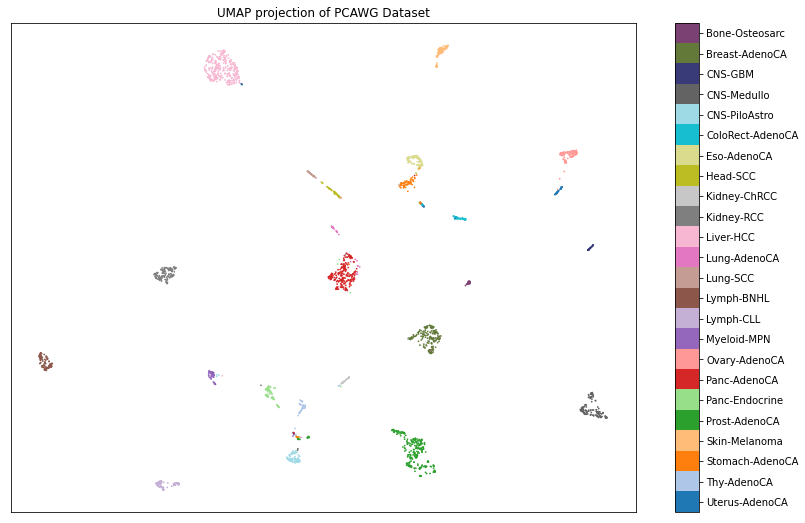

In [21]:
cmap = mpl.colors.ListedColormap(my_palette)
    
fig, ax = plt.subplots(1, figsize=(14, 9))
x = digits_df['x'].tolist()
y = digits_df['y'].tolist()

list_labelplot = list_label
cmapplot = mpl.colors.ListedColormap(my_palette)
plt.scatter(x,y, s=0.5, c=digits_df['target_id'], cmap=cmapplot, alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(25)-0.5,ax=[ax],location='right')
cbar.set_ticks(np.arange(25))
cbar.set_ticklabels(list_labelplot)
cbar.ax.yaxis.set_ticks_position('right')
#cbar.ax.yaxis.set_ticks_position('bottom')
cbar.ax.invert_yaxis() 

plt.title('UMAP projection of PCAWG Dataset')
plt.savefig('UMAP_revision.jpg',dpi=1200)